# X. Training Neural Networks

The following code is used to train save neural networks for all datasets. Training will be done using both the Adam optimizer and Adahessian. We will save the results to a text file. 

In [1]:
import sys

sys.path.append("../../")
sys.path.append("/home/ferroelectric/m3_learning/m3_learning/src")

In [34]:
%load_ext autoreload
%autoreload 2

import numpy as np

from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.viz.printing import printer
from m3_learning.be.viz import Viz
from m3_learning.be.dataset import BE_Dataset
from m3_learning.be.nn import SHO_fit_func_nn, SHO_Model, batch_training

printing = printer(basepath = './Figures/')


set_style("printing")
random_seed(seed=42)

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


## Loads Data


In [5]:
# Specify the filename and the path to save the file
filename = "data_raw_SHO.h5"
save_path = "./Data"


data_path = save_path + "/" + filename

# instantiate the dataset object
dataset = BE_Dataset(data_path, resample_bins=None, SHO_fit_func_NN=SHO_fit_func_nn)

# print the contents of the file
dataset.print_be_tree()

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Noisy_Data_1
    ├ Noisy_Data_2
    ├ Noisy_Data_3
    ├ Noisy_Data_4
    ├ Noisy_Data_5
    ├ Noisy_Data_6
    ├ Noisy_Data_7
    ├ Noisy_Data_8
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices
├ Noisy_Data_1_SHO_Fit
  --------

In [6]:
optimizers = ['Adam', "AdaHessian"]
noise = [1, 2, 3, 0, 4, 5, 6, 7, 8, 9]
batch_size = [100, 250, 500, 1000, 2000, 5000, 10000]
epochs = [5]
seed = [42]

batch_training(dataset, optimizers, noise, batch_size, epochs, seed, write_CSV = "Batch_training_noise.csv")

Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42

    Dataset = Noisy_Data_1
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = None
    Noise Level = 1
                  
None
Working on combination: SHO_Adam_noise_1_batch_size_100_seed_42
Using GPU NVIDIA GeForce RTX 3090


NameError: name 'basepath' is not defined

Working on combination: SHO_Adam_noise_0_batch_size_100
Working on combination: SHO_Adam_noise_0_batch_size_250
Working on combination: SHO_Adam_noise_0_batch_size_500
Working on combination: SHO_Adam_noise_0_batch_size_1000
Working on combination: SHO_Adam_noise_0_batch_size_2000
Working on combination: SHO_Adam_noise_0_batch_size_5000
Working on combination: SHO_Adam_noise_0_batch_size_10000
Working on combination: SHO_Adam_noise_1_batch_size_100
Working on combination: SHO_Adam_noise_1_batch_size_250
Working on combination: SHO_Adam_noise_1_batch_size_500
Working on combination: SHO_Adam_noise_1_batch_size_1000
Working on combination: SHO_Adam_noise_1_batch_size_2000
Working on combination: SHO_Adam_noise_1_batch_size_5000
Working on combination: SHO_Adam_noise_1_batch_size_10000
Working on combination: SHO_Adam_noise_2_batch_size_100
Working on combination: SHO_Adam_noise_2_batch_size_250
Working on combination: SHO_Adam_noise_2_batch_size_500
Working on combination: SHO_Adam_noise

In [6]:
# constructs a test train split
X_train, X_test, y_train, y_test = dataset.test_train_split_(shuffle=True)


    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = None
    Noise Level = 0
                  
None


In [8]:
from m3_learning.optimizers.TrustRegion import TRCG


In [20]:
isinstance(optimizer_TR, dict)

True

In [38]:
optimizer_TR = {"name": "TRCG", "optimizer": TRCG, "radius": 5, "device": "cuda", "ADAM_epochs": 2}
optimizers = [optimizer_TR, 'Adam']
noise = [0]
batch_size = [100, 250, 500, 1000, 2000, 5000, 10000]
epochs = [5]
seed = [42, 43, 44, 45, 46]

batch_training(dataset, optimizers, noise, batch_size, epochs, seed, write_CSV = "Batch_Trainging_SpeedTest.csv", basepath = '5_18_SpeedTestTraining', early_stopping_loss = .036, early_stopping_count = X_train.shape[0]//3)

The type is <class 'dict'>
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42

    Dataset = Raw_Data
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = None
    Noise Level = 0
                  
None
Working on combination: SHO_TRCG_noise_0_batch_size_100_seed_42
Using GPU NVIDIA GeForce RTX 3090
Saving to Trained Models/SHO Fitter//5_18_SpeedTestTraining/
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42
Adam
epoch : 1/5, recon loss = 0.04121128
--- 132.15878891944885 seconds ---
Adam
epoch : 2/5, recon loss = 0.03421265
--- 133.1693935394287 seconds ---
Adam
epoch : 3/5, recon loss = 0.03396352
--- 131.99110174179077 seconds ---
Trust Region CG
epoch : 4/5, recon loss = 0.03355175
--- 2665.3646399974823 seconds ---


CG has issues !!

In [42]:
dataset.noise = 1

In [10]:
# constructs a test train split
X_train, X_test, y_train, y_test = dataset.test_train_split_(shuffle=True)


    Dataset = Noisy_Data_1
    Resample = False
    Raw Format = complex
    fitter = LSQF
    scaled = False
    Output Shape = pixels
    Measurement State = all
    Resample Resampled = False
    Resample Bins = 165
    LSQF Phase Shift = None
    NN Phase Shift = None
    Noise Level = 1
                  
None


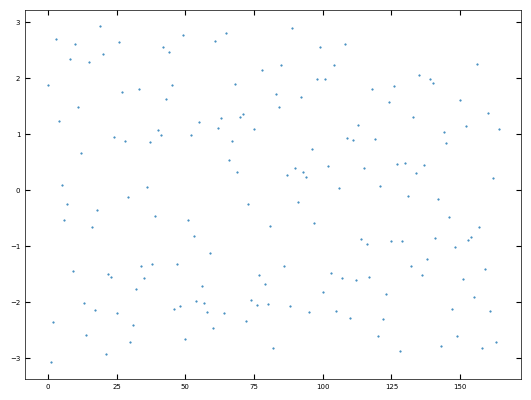

In [29]:
import matplotlib.pyplot as plt
plt.plot(X_train[500,:, 1], 'o', alpha=1)

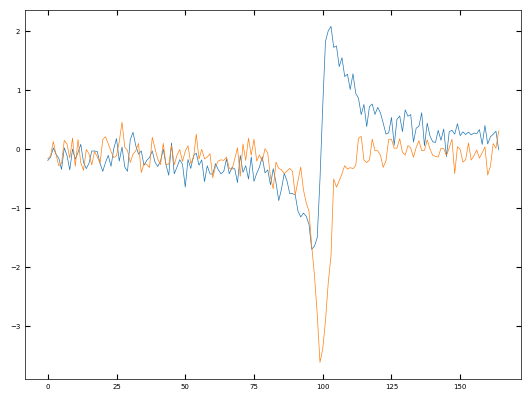

In [41]:
plt.plot(X_train[100])

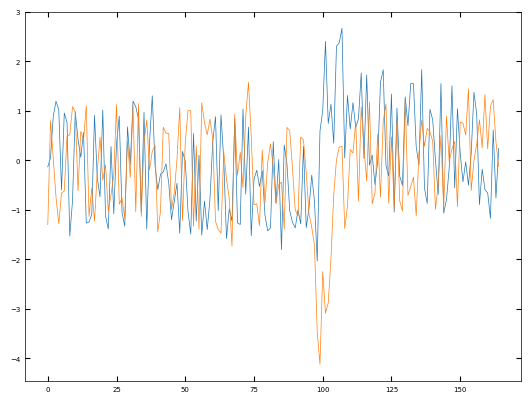

In [45]:
plt.plot(X_train[100])

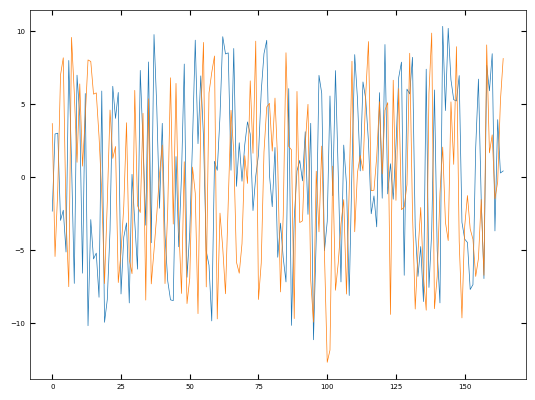

In [38]:
plt.plot(X_train[100])